LeNet-5 
- LeNet-5는 복잡하지 않은 망을 이용하여 (당시 기준)높은 성능을 보여주었을 뿐만 아니라 Convolutional layer와 pooling의 조합을 반복하는 현대적인 CNN 구조를 제안했다는 점에서 의미가 있는 모델 
- https://velog.io/@woojinn8/CNN-Network-1.-LeNet


Visual Geometry Group Net(VGGNet)

활성화 함수로 ReLU 사용, Dropout 적용

합성곱과 풀링 계층으로 구성된 블록과 분류를 위한 완전 연결계층으로 결합된 전형적인 구조

인위적으로 데이터셋을 늘림

이미지 변환, 좌우 반전 등의 변환을 시도
몇 개의 합성곱 계층과 최대 풀링 계층이 따르는 5개의 블록과 3개의 완전 연결계층으로 구성

모든 합성곱과 최대 풀링 계층에 padding='SAME' 적용

합성곱 계층에는 stride=1, 활성화 함수로 ReLU 사용

특성맵 깊이를 증가 시킴

척도 변경을 통한 데이터 보강(Data Augmentation)

3x3 커널을 갖는 두 합성곱 계층을 쌓은 스택이 5x5 커널을 갖는 하나의 합성곱 계층과 동일한 수용영역(ERF)을 가짐

11X11 사이즈의 필터 크기를 가지는 AlexNet과 비교하여 더 작은 합성곱 계층을 더 많이 포함해 더 큰 ERF를 얻음

이와 같이 합성곱 계층의 개수가 많아지면 매개변수 개수를 줄이고 비선형성을 증가시킴

VGG-19 아키텍쳐는 VGG-16에 3개의 합성곱 계층을 추가

LeNet-5, AlexNet, VGG-16, ResNet, Inception Network
https://wooono.tistory.com/233


- VGG-19 아키텍쳐

  - VGG-16에 3개의 합성곱 계층을 추가

  <br>   

  <img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16.png">
  <center>VGG-19 아키텍쳐</center>

  <sub>[이미지 출처] https://neurohive.io/en/popular-networks/vgg16/ </sub>


<br>

- (참고) ILSVRC의 주요 분류 metric 중 하나는 `top-5`
  
  - 상위 5개 예측 안에 정확한 클래스가 포함되면 제대로 예측한 것으로 간주

  - 일반적인 `top-k` metric의 특정 케이스


In [ ]:
import tensorflow as tf

vgg_net = tf.keras.applications.VGG16(include_top=True, weights='imagenet',
                                      input_tensor=None, input_shape=None,
                                      pooling=None, classes=1000)

vgg_net.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
import tensorflow as tf

vgg_net = tf.keras.applications.VGG19(include_top=True, weights='imagenet',
                                      input_tensor=None, input_shape=None,
                                      pooling=None, classes=1000)

vgg_net.summary()

574726144/574710816 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

# GoogLeNet, Inception 모듈

- VGGNet을 제치고 같은 해 분류 과제에서 1등을 차지

- 인셉션 블록이라는 개념을 도입하여, **인셉션 네트워크(Inception Network)**라고도 불림


  <img src="https://miro.medium.com/max/2800/0*rbWRzjKvoGt9W3Mf.png">

  <sub>[이미지 출처] https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5</sub>

  <br>

- 특징 
  
  - CNN 계산 용량을 최적화하는 것을 고려

  - 전형적인 합성곱, 풀링 계층으로 시작하고, 이 정보는 9개의 인셉션 모듈 스택을 통과  
    해당 모듈을 하위 네트워크라고도 함

  - 각 모듈에서 입력 특징 맵은 서로 다른 계층으로 구성된 4개의 병렬 하위 블록에 전달되고, 이를 서로 다시 연결

  - 모든 합성곱과 풀링 계층의 padding옵션은 "SAME"이며 `stride=1`,  
    활성화 함수는 `ReLU` 사용

- 기여

  - 규모가 큰 블록과 병목을 보편화

  - 병목 계층으로 1x1 합성곱 계층 사용

  - 완전 연결 계층 대신 풀링 계층 사용

  - 중간 소실로 경사 소실 문제 해결

  <img src="https://norman3.github.io/papers/images/google_inception/f01.png">

  <sub>[이미지 출처] https://norman3.github.io/papers/docs/google_inception.html</sub>


In [ ]:
inception3_net = tf.keras.applications.InceptionV3(include_top=True, weights='imagenet',
                                      input_tensor=None, input_shape=None,
                                      pooling=None, classes=1000)

inception3_net.summary()

ResNet - 잔차 네트워크
- ResNet은 마이크로소프트에서 개발한 알고리즘이며 깊은 신경망을 제공합니다.
- 네트워크의 깊이가 깊어질수록 경사가 소실되거나 폭발하는 문제를 해결하고자 함
- 기존의 망과 차이가 있다면, l+2번째 비선형 함수 입력값에 l 번째 비선형 함수 출력값을 더해줄 수 있도록 지름길(shortcut)을 하나 만들어준다
- 병목 합성곱 계층을 추가하거나 크기가 작은 커널을 사용
- 152개의 훈련 가능한 계층을 수직으로 연결하여 구성
- 모든 합성곱과 풀링 계층에서 패딩옵션으로 'SAME', stride=1 사용
- 3x3 합성곱 계층 다음마다 배치 정규화 적용, 1x1 합성곱 계층에는 활성화 함수가 존재하지 않음
<img src="https://miro.medium.com/max/1200/1*6hF97Upuqg_LdsqWY6n_wg.png">

  <sub>[이미지 출처] https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8</sub>


In [ ]:
resnet50 = tf.keras.applications.ResNet50(
    include_top=True, weights='imagenet',
    input_tensor=None, input_shape=None,
    pooling=None, classes=1000)

resnet50.summary()

[과제] VGG19를 적용하여 강아지 고양이 분류 모델을 구성 후 성능을 시각화하여 평가하세요.(사전학습된 모델 적용, 데이터 증식, 미세조정)

In [ ]:
from tensorflow.keras.applications import VGG19

conv_base = VGG19(include_top=False, weights='imagenet', input_shape=(150,150,3))


80150528/80134624 [==============================] - 2s 0us/step


In [ ]:
# 먼저 VGG19 모델 자체만의 성능을 보려고 합니다.
# 이 모델에 저희가 가진 이미지 데이터를 통과시켜 특성을 추출합니다.

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/중앙정보처리학원/m9_딥러닝알고리즘구현/dataset/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# 나온 특성들을 독립적으로 새로 만든 완전연결층의 input으로 사용하고 훈련해줍니다.

from tensorflow.keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


100/100 [==============================] - 2s 6ms/step - loss: 0.6482 - acc: 0.6385 - val_loss: 0.4526 - val_acc: 0.8140
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4322 - acc: 0.8020 - val_loss: 0.3581 - val_acc: 0.8740
Epoch 3/30
100/100 [==============================] - 0s 5ms/step - loss: 0.3626 - acc: 0.8410 - val_loss: 0.3212 - val_acc: 0.8790
Epoch 4/30
100/100 [==============================] - 0s 5ms/step - loss: 0.3056 - acc: 0.8730 - val_loss: 0.2943 - val_acc: 0.8900
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2881 - acc: 0.8805 - val_loss: 0.2804 - val_acc: 0.8920
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2544 - acc: 0.8965 - val_loss: 0.2683 - val_acc: 0.8990
Epoch 7/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2415 - acc: 0.9020 - val_loss: 0.2793 - val_acc: 0.8820
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2331 - acc:

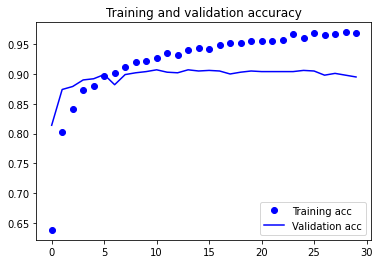

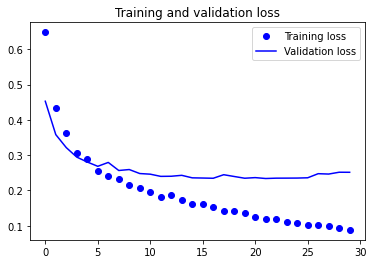

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        
        train_dir,
        
        target_size=(150, 150),
        batch_size=20,
       
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
100/100 - 37s - loss: 0.5626 - acc: 0.7210 - val_loss: 0.4772 - val_acc: 0.7750 - 37s/epoch - 368ms/step
Epoch 2/30
100/100 - 35s - loss: 0.4489 - acc: 0.8060 - val_loss: 0.3933 - val_acc: 0.8230 - 35s/epoch - 348ms/step
Epoch 3/30
100/100 - 33s - loss: 0.3972 - acc: 0.8295 - val_loss: 0.3424 - val_acc: 0.8510 - 33s/epoch - 326ms/step
Epoch 4/30
100/100 - 35s - loss: 0.3666 - acc: 0.8365 - val_loss: 0.3191 - val_acc: 0.8690 - 35s/epoch - 353ms/step
Epoch 5/30
100/100 - 37s - loss: 0.3551 - acc: 0.8470 - val_loss: 0.3199 - val_acc: 0.8690 - 37s/epoch - 369ms/step
Epoch 6/30
100/100 - 33s - loss: 0.3331 - acc: 0.8620 - val_loss: 0.3078 - val_acc: 0.8750 - 33s/epoch - 330ms/step
Epoch 7/30
100/100 - 35s - loss: 0.3224 - acc: 0.8585 - val_loss: 0.2981 - val_acc: 0.8680 - 35s/epoch - 347ms/step
Epoch 8/30
100/100 - 36s - loss: 0.3096 - acc: 0.8705 - val_loss: 0.2830 - val_acc: 0.8730 - 36s/epoch - 359ms/step
Epoch 9/30
100/100 - 35s - loss: 0.3010 - acc: 0.8780 - val_loss: 0.2938

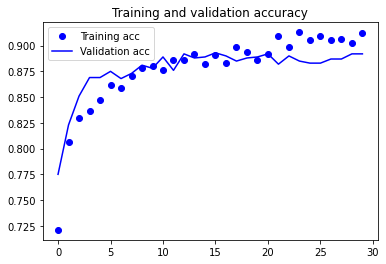

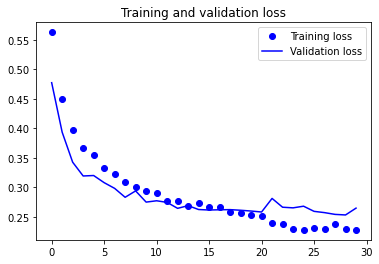

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
conv_base.layers[2].name

'block1_conv2'

In [ ]:
# 특정 층까지 모든 층 동결

conv_base.trainable = True

set_trainable = 0
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = 1
    if set_trainable == 1:
        layer.trainable = True
    elif set_trainable == 0:
        layer.trainable = False

In [ ]:
# print 해서 중간 중간 보면 조금 더 이해가 가실 수 있습니다. (feat.기현이형)
set_trainable = 0
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = 1
    if set_trainable == 1:
        layer.trainable = True
        print(set_trainable)
    elif set_trainable == 0:
        layer.trainable = False
        print(set_trainable)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
100/100 [==============================] - 37s 352ms/step - loss: 0.2427 - acc: 0.8920 - val_loss: 0.2343 - val_acc: 0.9040
Epoch 2/100
100/100 [==============================] - 33s 333ms/step - loss: 0.1946 - acc: 0.9200 - val_loss: 0.2271 - val_acc: 0.9100
Epoch 3/100
100/100 [==============================] - 34s 336ms/step - loss: 0.1542 - acc: 0.9395 - val_loss: 0.2194 - val_acc: 0.9180
Epoch 4/100
100/100 [==============================] - 33s 331ms/step - loss: 0.1247 - acc: 0.9540 - val_loss: 0.2243 - val_acc: 0.9210
Epoch 5/100
100/100 [==============================] - 33s 334ms/step - loss: 0.1335 - acc: 0.9455 - val_loss: 0.2416 - val_acc: 0.9170
Epoch 6/100
100/100 [==============================] - 33s 333ms/step - loss: 0.0967 - acc: 0.9660 - val_loss: 0.2211 - val_acc: 0.9260
Epoch 7/100
100/100 [==============================] - 33s 332ms/step - loss: 0.0863 - acc: 0.9650 - val_loss: 0.2675 - val_acc: 0.9140
Epoch 8/100
100/100 [===========================

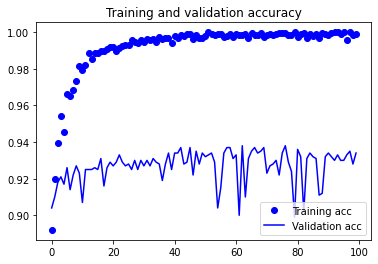

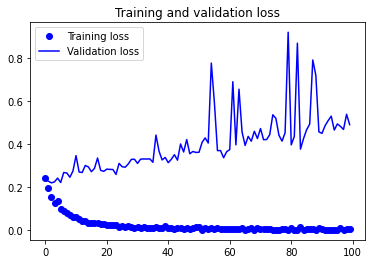

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

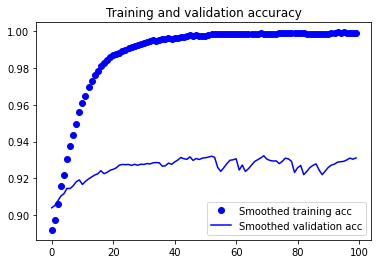

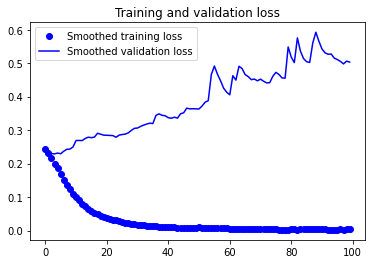

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

[과제] 상기 과제에서 미세조정을 최상위 BLOCK 2개를 적용해서 수행하세요.

In [ ]:
# 특정 층까지 모든 층 동결

conv_base.trainable = True

set_trainable = 0

for layer in conv_base.layers:
    if layer.name == 'block4_conv1':
        set_trainable = 1


    if set_trainable == 1:
        layer.trainable = True
    elif set_trainable == 0:
        layer.trainable = False

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/100
100/100 [==============================] - 37s 355ms/step - loss: 0.0322 - acc: 0.9915 - val_loss: 0.4587 - val_acc: 0.9240
Epoch 2/100
100/100 [==============================] - 35s 353ms/step - loss: 0.0279 - acc: 0.9925 - val_loss: 0.5105 - val_acc: 0.9150
Epoch 3/100
100/100 [==============================] - 35s 351ms/step - loss: 0.0161 - acc: 0.9930 - val_loss: 0.4438 - val_acc: 0.9300
Epoch 4/100
100/100 [==============================] - 35s 351ms/step - loss: 0.0176 - acc: 0.9945 - val_loss: 0.3940 - val_acc: 0.9210
Epoch 5/100
100/100 [==============================] - 35s 352ms/step - loss: 0.0030 - acc: 0.9990 - val_loss: 0.4207 - val_acc: 0.9300
Epoch 6/100
100/100 [==============================] - 35s 349ms/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.3530 - val_acc: 0.9360
Epoch 7/100
100/100 [==============================] - 35s 352ms/step - loss: 0.0322 - acc: 0.9895 - val_loss: 0.4874 - val_acc: 0.8990
Epoch 8/100
100/100 [===========================

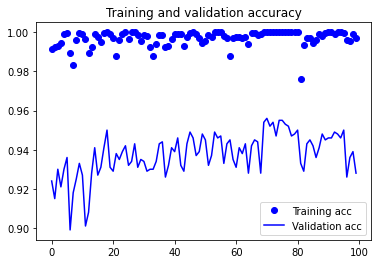

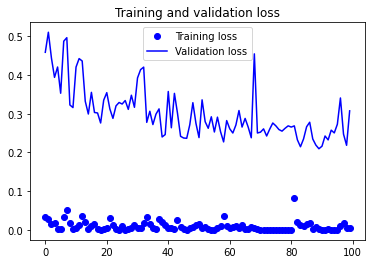

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

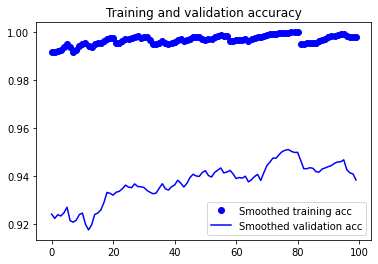

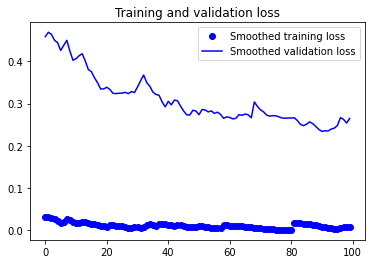

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


test acc: 0.9359999895095825
